<a href="https://colab.research.google.com/github/JesusDavGarcia/MNIST_NaiveBayes/blob/main/MNIST_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Analysis Using Naive Bayes**

---

The purpose of this project is to Classify images of the MNIST database (*Modified National Institute of Standards and Technology*), which is made by a large dataset of handwritten digits that is commonly used for training various image processing systems, using a Naive Bayes Classifier algorithm.


## Load the Data

We have to first load the images of the MNIST database. Each image in this dataset is a 28 x 28 pixel grayscale image. Each pixel has a integer in the range [0, 255], where 0 represents black and 255 represents white. We can normalize this value to a range between [0,1], where 1 is the color white.

The MNIST dataset loaded using TensorFlow is already split into a training set and a test set. The Training set has 60,000 images, while the Test set has 10,000 images.

We can load the data as follows:

In [1]:
# Import TensorFlow
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Load the training and test data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Check the shape of the data
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


11490434/11490434 [==============================] - 0s 0us/step
Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


## Preprocess the data

In order to analyze the data, we will proceed by converting the images into a 1D Array of elements. The purpose of doing this is to have the image as a vector, and analyze the color of each individual pixel. The Naive Bayes will use this information (for example, given that this vector has a value of 1 in the first position, what is the chance it is the number 1?).

Since the images are 28 x 28, the 1D Array or vector will have 784 values, each value representing a pixel of the image.

In [2]:
# Reshape the images to 1D arrays (vectors)
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# Check the new shape of the data
print("Training Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)


Training Images Shape: (60000, 784)
Test Images Shape: (10000, 784)


## Train-Test Split

In a normal project, the next step would be to split the data into a training set and a test set. For this case, however, the data is already split when loaded from TensorFlow, so we will continue with training the model.

## Train the Model

We will train the model with the training set already loaded (train_images and train_labels). We will use the GaussianNB, which assumes that the class follows a Gaussian or Normal Distribution.

Training the model with the 60,000 images will allow it to detect patterns for each of the images. The model will be given the 1D Arrays or vectors for 60,000 images along its label. This way, it can calculate the conditional probabilities when given a new image (given this 1D Array or vector, what is chance it is X number?).

In [3]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create an instance of the GaussianNB class
model = GaussianNB()

# Fit the model to the training data
model.fit(train_images, train_labels)

# Make predictions on the test data
predictions = model.predict(test_images)

# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predictions)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.5558


Testing the model against the test_images, we obtain an accuracy of 55.58%. This means that the model can accurately classify an image 55.58% of the times. Let´s see some image examples along with the classification of the model:

#### Examples:

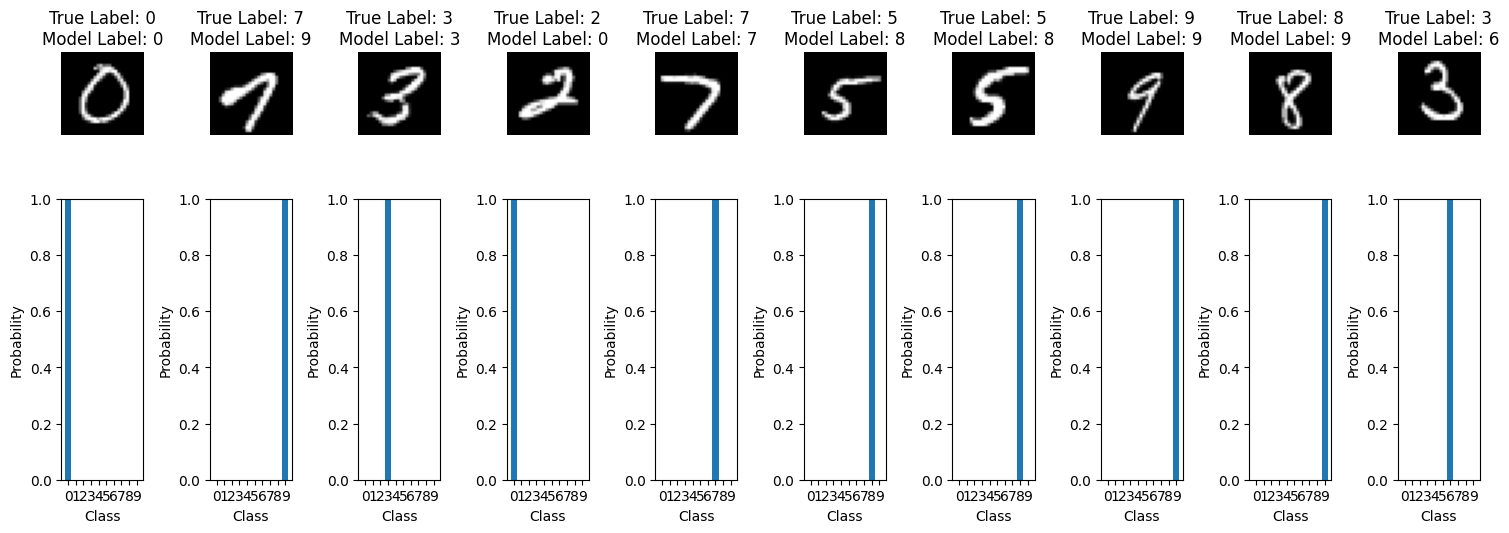

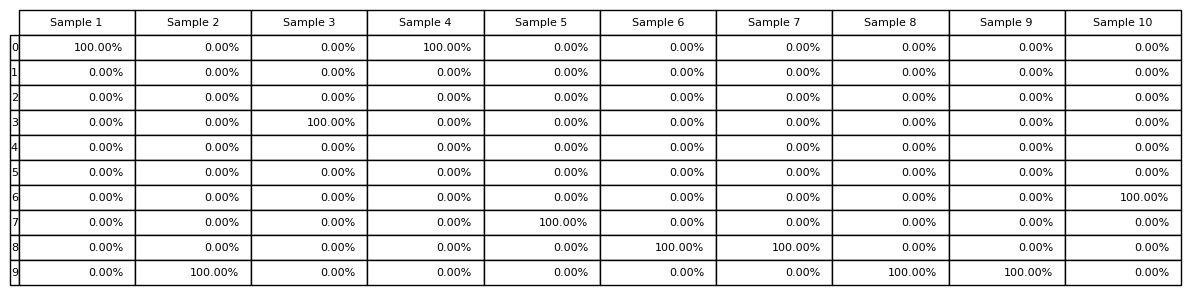

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random samples to display
num_samples = 10

# Initialize the figure for images and bar plots
fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

# Store class probabilities and predicted labels for all samples
all_class_probabilities = []
all_predicted_labels = []

# Loop over the number of samples
for i in range(num_samples):
    # Randomly choose an index from the test set
    random_index = np.random.randint(len(test_images))

    # Select the corresponding image and label
    selected_image = test_images[random_index].reshape(1, -1)
    true_label = test_labels[random_index]

    # Use the trained model to predict the class probabilities and label for the selected image
    class_probabilities = model.predict_proba(selected_image)
    predicted_label = model.predict(selected_image)
    all_class_probabilities.append(class_probabilities[0])
    all_predicted_labels.append(predicted_label[0])

    # Display the selected image
    ax = axes[0, i]
    ax.imshow(selected_image.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"True Label: {true_label}\nModel Label: {predicted_label[0]}")

    # Display the class probabilities as a bar plot
    ax = axes[1, i]
    ax.bar(range(10), class_probabilities[0])
    ax.set_xticks(range(10))
    ax.set_ylim(0, 1)
    ax.set_ylabel("Probability")
    ax.set_xlabel("Class")

plt.tight_layout()
plt.show()

# Initialize the figure for the table
fig, ax = plt.subplots(figsize=(15, 1))

# Display the class probabilities as a table
ax.axis('off')
table_data = np.array(all_class_probabilities).T
table_data = [[f"{prob*100:.2f}%" for prob in row] for row in table_data]
table = ax.table(cellText=table_data, rowLabels=range(10), colLabels=[f"Sample {i+1}" for i in range(num_samples)], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)

plt.show()





From this 10 examples it is possible to see that the model misses for several values and accurately classifies some of them.

## Evaluate the Model

We already know the accuracy of the model, but let´s check for other metrics:

In [ ]:
import pandas as pd
from tabulate import tabulate

# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

# Get the classification report as a dictionary
report_dict = classification_report(test_labels, predictions, output_dict=True)

# Convert the classification report to a DataFrame and then to a pretty table
report_df = pd.DataFrame(report_dict).transpose()
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='grid'))

# Get the confusion matrix and convert it to a pretty table
conf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(tabulate(conf_matrix, tablefmt='grid'))

# Create explanation tables
classification_report_explanation = [
    ["Precision", "The ratio of correctly predicted positive observations to the total predicted positives."],
    ["Recall (Sensitivity)", "The ratio of correctly predicted positive observations to the all observations in actual class."],
    ["F1 Score", "The weighted average of Precision and Recall."],
    ["Support", "The number of actual occurrences of the class in the specified dataset."],
    ["Macro Avg", "The average of the unweighted mean per label."],
    ["Weighted Avg", "The average of the weighted mean per label."]
]



print("Classification Report Explanation:")
print(tabulate(classification_report_explanation, headers=['Term', 'Explanation'], tablefmt='grid'))




Accuracy: 0.5558
Classification Report:
+--------------+-------------+-----------+------------+------------+
|              |   precision |    recall |   f1-score |    support |
+==============+=============+===========+============+============+
| 0            |    0.790191 | 0.887755  |   0.836136 |   980      |
+--------------+-------------+-----------+------------+------------+
| 1            |    0.845611 | 0.950661  |   0.895064 |  1135      |
+--------------+-------------+-----------+------------+------------+
| 2            |    0.904762 | 0.257752  |   0.401207 |  1032      |
+--------------+-------------+-----------+------------+------------+
| 3            |    0.708835 | 0.349505  |   0.46817  |  1010      |
+--------------+-------------+-----------+------------+------------+
| 4            |    0.884211 | 0.171079  |   0.286689 |   982      |
+--------------+-------------+-----------+------------+------------+
| 5            |    0.55     | 0.0493274 |   0.090535 |   892  

####Interpretation:

**Class 0:**

Precision: 79.02% - Of all instances predicted as class 0, 79.02% are actually class 0.

Recall: 88.78% - Of all actual instances of class 0, 88.78% were correctly identified by the model.

F1-Score: 83.61% - The harmonic mean of precision and recall, indicating a balance between the two.



Macro Avg: The average of the unweighted mean per label.

Precision: 68.65%
Recall: 54.84%
F1-Score: 50.90%
Weighted Avg: The average of the weighted mean per label.

Precision: 69.17%
Recall: 55.58%
F1-Score: 51.70%

The overall accuracy of the model is 55.58%, which is not very high. The macro and weighted averages also provide insights into the unbalanced performance across different classes. Classes like 2, 5, 8, and 9 are particularly challenging for the model, and improvements are needed for these classes to enhance overall performance.



The confusion matrix can be read as follows:

 ⟹ first row of this matrix corresponds to the digit 0. The first value in this row, 870, represents the True Positive (TP) for the digit 0, meaning 870 instances of 0 were correctly predicted as 0. The rest of the values in this row are the False Negatives (FN) for the digit 0, meaning these instances were 0 but were incorrectly predicted as other digits. For example, 35 instances of 0 were incorrectly predicted as 8.

 ⟹ The second row corresponds to the digit 1. The value 1079 at the intersection of the second row and the second column is the TP for the digit 1, meaning 1079 instances of 1 were correctly predicted as 1. The rest of the values in this row are the FN for the digit 1.

 ⟹ Similarly, each subsequent row corresponds to the digits 2 through 9, with the diagonal values representing the TP for each digit, and the off-diagonal values representing the FN.

 ⟹ Each column represents the instances in an actual class. For example, the first column represents all instances that are actually 0. The value 870 in the first column and the first row is the TP for 0, and the rest of the values in this column are the False Positives (FP) for 0, meaning these instances were not 0 but were incorrectly predicted as 0.

 ⟹ The last value in the last column and last row, 955, is the TP for the digit 9, meaning 955 instances of 9 were correctly predicted as 9.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(train_images, train_labels)

# Make predictions and calculate accuracy
rf_predictions = rf_model.predict(test_images)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print("Random Forest Model Accuracy:", rf_accuracy)


Random Forest Model Accuracy: 0.9704


ejemplos 2

True Label: 2
Class Probabilities:
0: 0.00%
1: 0.00%
2: 93.00%
3: 1.00%
4: 3.00%
5: 0.00%
6: 1.00%
7: 0.00%
8: 0.00%
9: 2.00%


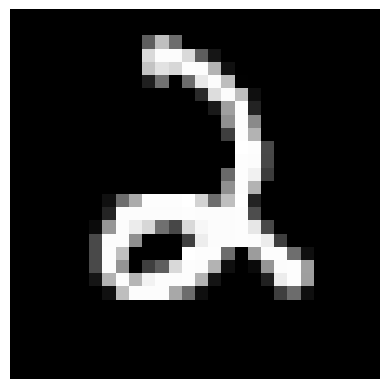

True Label: 5
Class Probabilities:
0: 0.00%
1: 0.00%
2: 1.00%
3: 11.00%
4: 4.00%
5: 72.00%
6: 0.00%
7: 3.00%
8: 4.00%
9: 5.00%


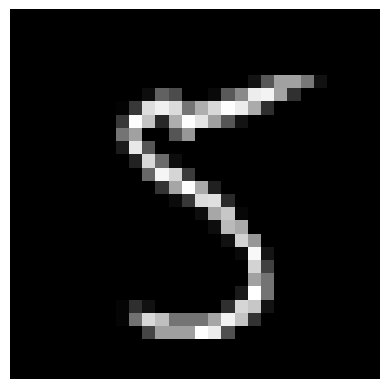

True Label: 9
Class Probabilities:
0: 4.00%
1: 0.00%
2: 7.00%
3: 1.00%
4: 10.00%
5: 3.00%
6: 3.00%
7: 0.00%
8: 4.00%
9: 68.00%


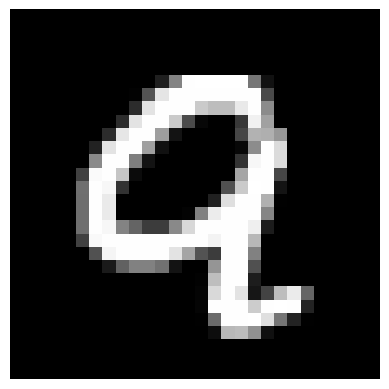

True Label: 3
Class Probabilities:
0: 2.00%
1: 3.00%
2: 0.00%
3: 54.00%
4: 3.00%
5: 22.00%
6: 2.00%
7: 14.00%
8: 0.00%
9: 0.00%


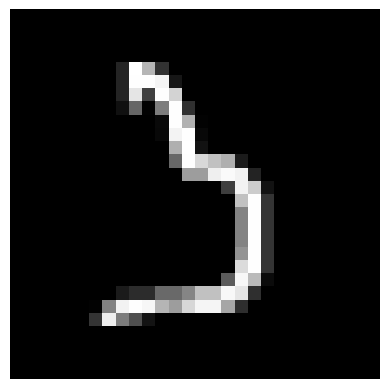

True Label: 2
Class Probabilities:
0: 0.00%
1: 2.00%
2: 88.00%
3: 4.00%
4: 1.00%
5: 0.00%
6: 0.00%
7: 3.00%
8: 1.00%
9: 1.00%


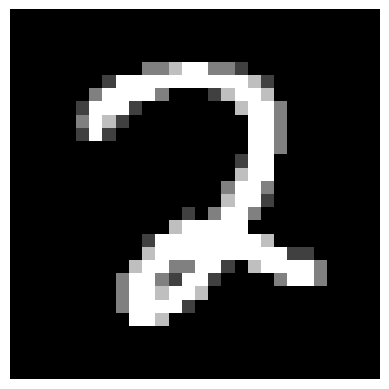

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(train_images, train_labels)

# Number of random samples to display
num_samples = 5

# Loop over the number of samples
for _ in range(num_samples):
    # Randomly choose an index from the test set
    random_index = np.random.randint(len(test_images))

    # Select the corresponding image and label
    selected_image = test_images[random_index].reshape(1, -1)
    true_label = test_labels[random_index]

    # Use the trained Random Forest model to predict the class probabilities for the selected image
    class_probabilities = rf_model.predict_proba(selected_image)

    # Print the true label of the selected image
    print("True Label:", true_label)

    # Print the class probabilities
    print("Class Probabilities:")
    for i, prob in enumerate(class_probabilities[0]):
        print(f"{i}: {prob*100:.2f}%")

    # Reshape the selected image back to 28x28 and display it
    selected_image_reshaped = selected_image.reshape(28, 28)
    plt.imshow(selected_image_reshaped, cmap='gray')
    plt.axis('off')
    plt.show()


## Creating a New Digit

1/1 [==============================] - 0s 88ms/step


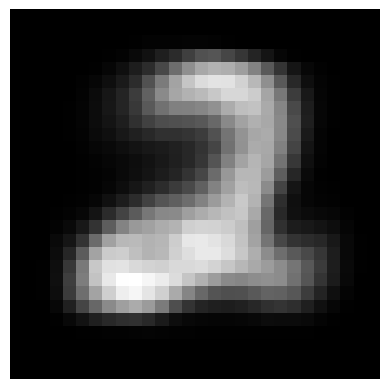

In [ ]:
def generate_digit_image(digit):
    # Ensure the input digit is valid
    if digit < 0 or digit > 9:
        print("Invalid digit. Please enter a digit between 0 and 9.")
        return

    # Select the encoded points corresponding to the input digit
    encoded_digits = x_encoded[train_labels == digit]

    # Compute the mean of the encoded points for the input digit
    mean_encoded_digit = np.mean(encoded_digits, axis=0)

    # Decode the mean encoded point to generate a new image of the digit
    generated_image = decoder.predict(mean_encoded_digit.reshape(1, -1)).reshape(28, 28)

    # Display the generated image
    plt.imshow(generated_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Call the function with the desired digit
generate_digit_image(2)


1/1 [==============================] - 0s 37ms/step


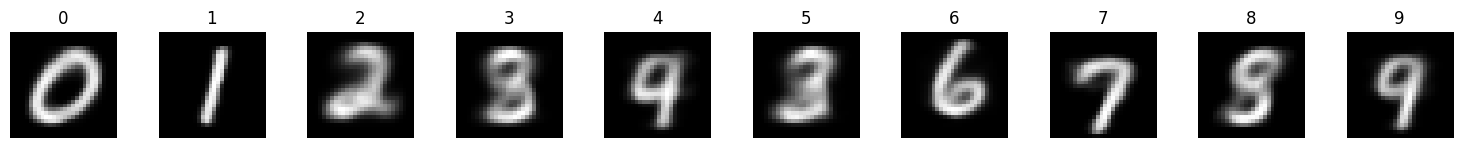

In [ ]:
def generate_digit_image(digit):
    # Ensure the input digit is valid
    if digit < 0 or digit > 9:
        print("Invalid digit. Please enter a digit between 0 and 9.")
        return None

    # Select the encoded points corresponding to the input digit
    encoded_digits = x_encoded[train_labels == digit]

    # Compute the mean of the encoded points for the input digit
    mean_encoded_digit = np.mean(encoded_digits, axis=0)

    # Decode the mean encoded point to generate a new image of the digit
    generated_image = decoder.predict(mean_encoded_digit.reshape(1, -1)).reshape(28, 28)

    return generated_image

# Initialize the plot
fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))

# Generate and display images for each digit from 0 to 9
for digit in range(10):
    img = generate_digit_image(digit)
    ax = axes[digit]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(str(digit))

plt.tight_layout()
plt.show()
